# STABLA
## Definicija
Stablo je struktura podataka koja se sastoji od čvorova i bridova (pritom ne smiju postojati ciklusi). Stablo koje nema čvorova se naziva prazno stablo. Stablo koje nije prazno se sastoji od korijena i potencijalno dosta razina čvorova te se na taj način stvara hijerarhija (odnos "podređeni-nadređeni" ili "dijete-roditelj").  

## Terminologija koju ćemo koristiti
+ **korijen** - čvor na vrhu stabla
+ **oznaka** od čvora x - vrijednost koja je pridružena čvoru
+ **dijete** od čvora x - čvor koji je povezan sa čvorom x i nalazi se u smjeru suprotnom od korijena
+ **roditelj** od čvora x - čvor koji je povezan sa čvorom x i nalazi se u smjeru korijena stabla
+ **list** - čvor bez djece
+ **unutrašnji čvor** - čvor koji nije list

# Binarno stablo
Umjesto stabala (koja se često razmatraju u matematici) u računarstvu se još češće pojavljuju binarna stabla. Radi se o nešto jednostavnijem i pravilnije građenom objektu kojeg je lakše prikazati u računalu. Binarno stablo je struktura podataka u kojem svaki čvor može imati lijevo dijete i desno dijete.

# Potpuno binarno stablo
Potpuno binarno stablo je binarno stablo u kojem svi unutrašnji čvorovi imaju oba djeteta i svi listovi se nalaze na istoj dubini.

In [1]:
from IPython.display import display
from ipywidgets import interact
import networkx as nx
import matplotlib.pyplot as plt

#pos je bio izgeneriran funkcijom, ali zbog preglednosti je ovdje hard kodiran
pos = {
     0: [0, 0],
     1: [-1, -1],
     2: [1, -1],
     3: [-1.5, -2], 
     4: [-0.5, -2],
     5: [0.5, -2],
     6: [1.5, -2],
     7: [-1.75, -3],
     8: [-1.25, -3],
     9: [-0.75, -3],
    10: [-0.25, -3],
    11: [0.25, -3],
    12: [0.75, -3],
    13: [1.25, -3],
    14: [1.75, -3] 
}

def draw_complete_binary_tree(n = 0):
    G = nx.balanced_tree(2, n)
    nx.draw(G, pos, with_labels=True, node_size = 800, node_color = "blue" )        

interact(draw_complete_binary_tree, n=(0, 3) );

interactive(children=(IntSlider(value=0, description='n', max=3), Output()), _dom_classes=('widget-interact',))

**Napomena 1.** Potpuno binarno stablo ne mora imati sve čvorove na zadnjoj razini. Npr. za n = 3, potpuno binarno stablo ne mora imati neke od čvorova na zadnjoj razini, npr. 13 i 14.

#  Binarno stablo pretraživanja
Binarno stablo pretraživanja je posebna vrsta binarnog stabla koja je izuzetno važna u mnogim primjenama. Oznake čvorova moraju zadovoljavati relaciju uređaja. U svakom čvoru oznaka mora biti veća od oznake lijevog djeteta i manja od oznake desnog djeteta.
U binarnom stablu pretraživanja možemo ubacivati i brisati čvorove, ali svaki put moramo paziti da gore navedeni uvjet ostane očuvan.

**Algoritam za pretraživanje:**
+ proslijedimo korijen stabla
+ ako je korijen prazan, vrijednost ne postoji u stablu
+ inače, ako je tražena oznaka jednaka oznaci korijena, pretraga je završila i vratimo pronađeni čvor
+ inače, ako je tražena oznaka strogo manja od korijena, pretražujemo lijevo podstablo
+ inače, pretražujemo desno podstablo

**Algoritam za ubacivanje:**
+ proslijedimo korijen stabla i oznaku koju želimo ubaciti
+ ako je oznaka jednaka oznaci korijena, čvor sa zadanom oznakom već postoji
+ ako je oznaka strogo manja od oznake korijena, ponavljamo postupak sa lijevim podstablom
+ inače, ponavljamo postupak sa desnim podstablom

**Algoritam za brisanje:**
Imamo tri moguća slučaja.
+ čvor nema djecu - jednostavno maknemo čvor
+ čvor ima jedno dijete: obrišemo čvor i zamijenimo ga sa njegovim djetetom
+ čvor ima oba djeteta: nađemo prvi čvor koji ima veću oznaku od zadanog (neka je to čvor A). Postavimo oznaku čvora na oznaku čvora A. Ako čvor A nije imao djecu, samo ga obrišemo, inače, zamijenimo oznaku čvora E sa oznakom njegovog djeteta.

Slijedi prikaz složenosti navedenih funkcionalnosti:

In [3]:
import pandas as pd
df = pd.DataFrame(
    {'' : ['Prostor', 'Pretraga', 'Ubacivanje', 'Brisanje'],
     'Prosječno' : [r'$O(n)$', r'$O(log n)$', r'$O(log n)$', r'$O(log n)$'],
     'Najgori slučaj' : [r'$O(n)$', r'$O(n)$', r'$O(n)$', r'$O(n)$']
})
df[['', 'Prosječno', 'Najgori slučaj']]

,,Prosječno,Najgori slučaj
0,Prostor,$O(n)$,$O(n)$
1,Pretraga,$O(log n)$,$O(n)$
2,Ubacivanje,$O(log n)$,$O(n)$
3,Brisanje,$O(log n)$,$O(n)$


**Napomena 2.** Složenost pretrage, ubacivanja i brisanja je u prosjeku  $O(logn)$, ali najgori slučaj je ipak $O(n)$, to se dogodi kad binarno stablo nije balansirano, primjer bi bio kad bi svaki čvor imao samo desno dijete.

Slijedi implementacija binarnog stabla pretraživanja (brisanje nije implementirano):

In [4]:
from enum import Enum
class Color(Enum):
    RED = 'red'
    BLACK = 'grey'
class Node:
    def __init__(self, data):
        self.data = data
        self.color = Color.RED
        self.left = None
        self.right = None
        self.parent = None
class BinarySearchTree:
    def __init__(self):
        self.root = None
    def clear(self):
        self.root = None
    def insert(self, data):
        x = Node(data)
        self.root = self.BSTInsert(self.root, x)
    def BSTInsert(self, root, x):
        if root is None:
            return x
        elif x.data < root.data:
            root.left = self.BSTInsert(root.left, x)
            root.left.parent = root
        elif x.data > root.data:
            root.right = self.BSTInsert(root.right, x)
            root.right.parent = root
        return root
    def search(self, data):
        result = self.searchHelper(self.root, data)
        return result
    def searchHelper(self, root, data):
        if root is None:
            return False
        elif root.data == data:
            return root
        elif root.data < data:
            return self.searchHelper(root.right, data)
        else:
            return self.searchHelper(root.left, data)
    def inorder(self):
        self.inorderHelper(self.root)
    def inorderHelper(self, root):
        if root is None:
            return
        self.inorderHelper(root.left)
        print(root.data)
        self.inorderHelper(root.right)
    def preorder(self):
        self.preorderHelper(self.root)
    def preorderHelper(self, root):
        if root is None:
            return
        print(root.data)
        self.preorderHelper(root.left)
        self.preorderHelper(root.right)
    def postorder(self):
        self.postorderHelper(self.root)
    def postorderHelper(self, root):
        if root is None:
            return
        self.postorderHelper(root.left)
        self.postorderHelper(root.right)
        print(root.data)
    #Function that draws binary tree and supports colors of nodes.
    def drawTree(self, nodeSize = 200, width = 30, height = 5):
        G = nx.Graph(); val_map = {}; pos = {};
        self.drawTreeHelper(self.root, G, val_map, pos)
        values = [val_map.get(node) for node in G.nodes()]
        plt.rcParams["figure.figsize"] = (width, height)
        nx.draw(G, pos, with_labels=True, node_size = nodeSize, node_color=values)
    def drawTreeHelper(self, root, G, val_map, pos):        
        if root is None:
            return
        G.add_node(root.data)
        if root.parent is None:
            pos[root.data] = [0, 0]
        else:
            if root.parent.parent is None:
                if root.parent.left == root:
                    pos[root.data] = [-2**7, -1]
                else:
                    pos[root.data] = [2**7, -1]
            else:
                distance = 0.5 * abs(pos[root.parent.data][0] - pos[root.parent.parent.data][0])
                if root.parent.left == root:
                    pos[root.data] = [pos[root.parent.data][0] - distance, pos[root.parent.data][1] - 1]
                else:
                    pos[root.data] = [pos[root.parent.data][0] + distance, pos[root.parent.data][1] - 1]
        val_map[root.data] = root.color.value
        if root.left is not None:
            G.add_node(root.left.data)
            G.add_edge(root.data, root.left.data)
            val_map[root.data] = root.color.value
            self.drawTreeHelper(root.left, G, val_map, pos)
        if root.right is not None:
            G.add_node(root.right.data)
            G.add_edge(root.data, root.right.data)
            val_map[root.data] = root.color.value
            self.drawTreeHelper(root.right, G, val_map, pos)

## Vizualizacija napomene 2. 
U prvom primjeru bi u 3 koraka dali odgovor na to postoji li čvor sa oznakom 7, dok u drugom bi nam trebalo 7 koraka.
### Primjer 1.

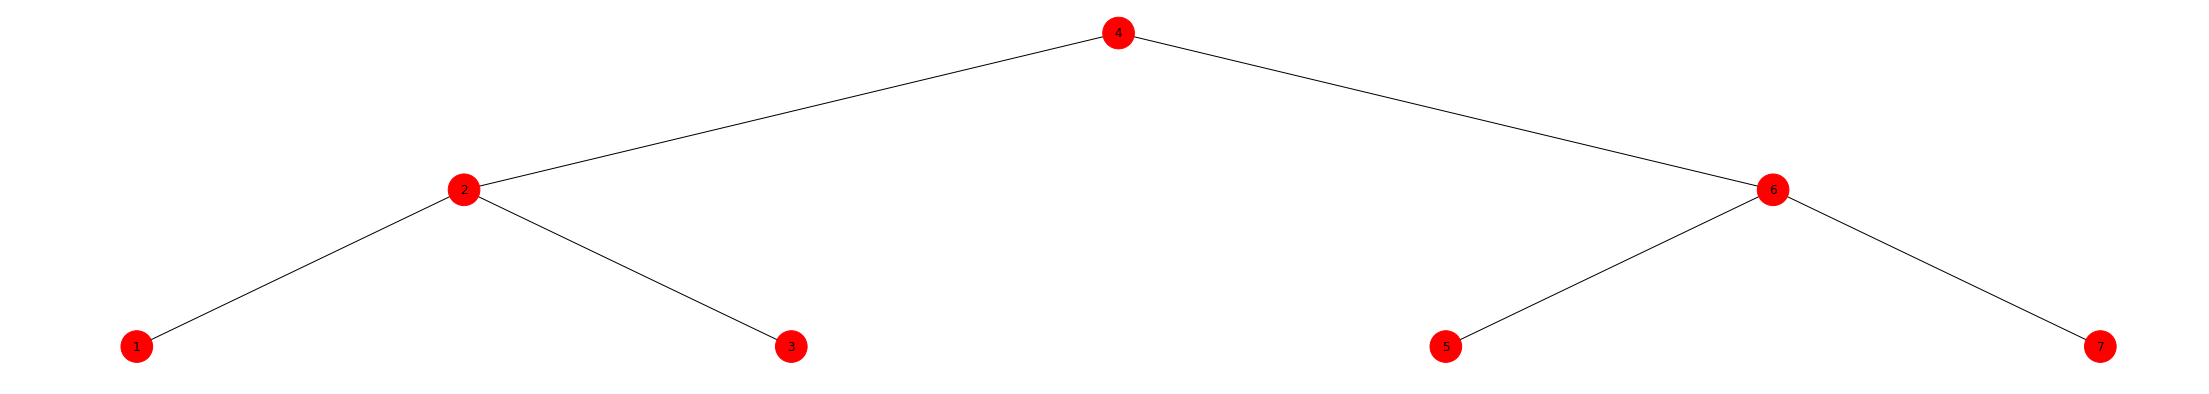

In [7]:
def generate_complete_binary_tree():
    bst = BinarySearchTree()
    for i in [4, 2, 3, 1, 6, 5, 7]:
        bst.insert(i)
    return bst
bst1 = generate_complete_binary_tree()
bst1.drawTree(1000)

### Primjer 2.

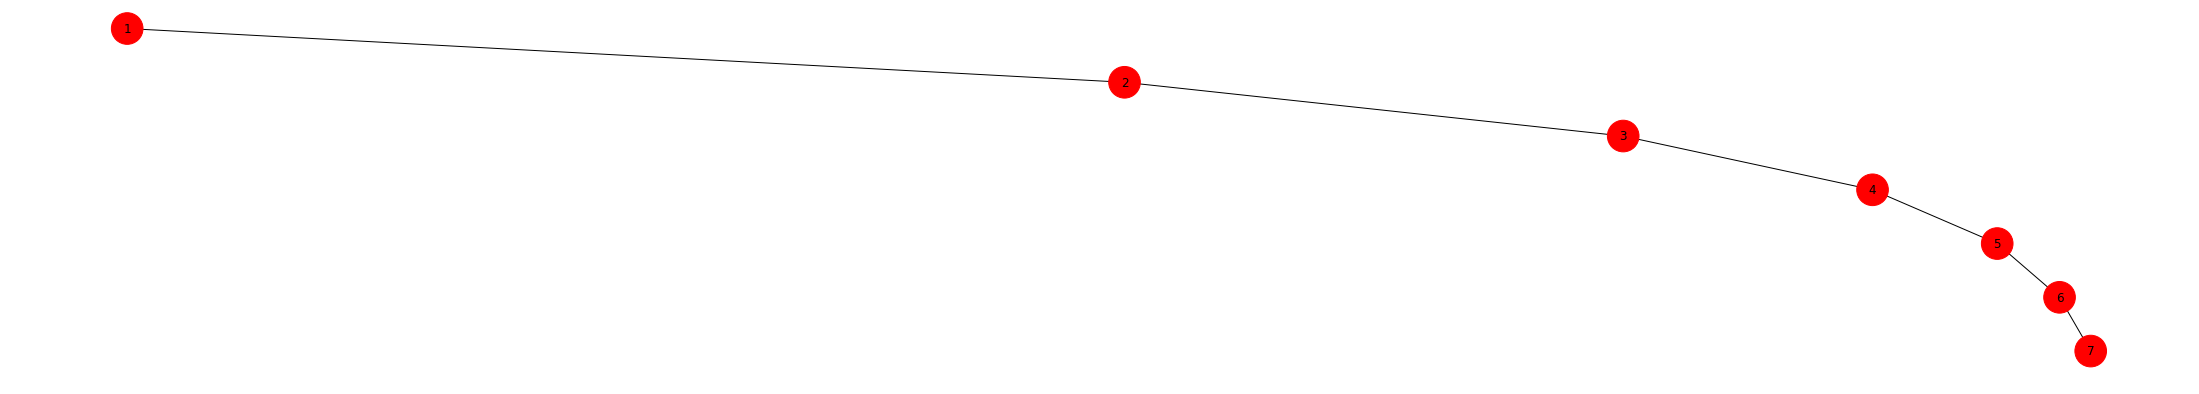

In [8]:
def generate_unbalanced_binary_tree():
    bst = BinarySearchTree()
    for i in range(7):
        bst.insert(i + 1)
    return bst
bst2 = generate_unbalanced_binary_tree()
bst2.drawTree(1000)